In [3]:
#3/7/24 For the implementation of K-Fold RF using combined Chemopy SR-ATAD5 Endocrine Data

import os
import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(1, '/Users/james/Documents/Honours/Python')
from Function_Repo import metriccalc

seed = 82
#Data import
datasets = []
index = []
directory = '/Users/james/Documents/Honours/Data/structdata/endocrine_redux/Chemopy/SR-ATAD5/'
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        df.drop(columns=['SMILES'], inplace=True)
        
        #drops 90% of negative columns to resolve class imbalance
        ytrain = df.iloc[:, 0].values
        reps = 0
        todrop = []
        for item in ytrain:
            if reps % 10 != 0 and item == 0:
                todrop.append(reps)
            reps = reps + 1

        df = df.drop(todrop)
        df = df.dropna(axis=1)
        datasets.append(df)
        index.append(file)

targetdata = datasets[0]
for item in datasets[1:]:
    targetdata = pd.concat([targetdata, item.iloc[:,2:]], axis=1)

targetdata = targetdata.dropna()

#Splitting data into 5 folds 
dfarray = targetdata.to_numpy()
#First set aside 20% of the data for a final validation at the end
dfarray, tempset = train_test_split(dfarray, test_size=0.2, random_state=seed)

size = len(dfarray) / 5
splitsize = math.ceil(size)
empty = [[] for _ in range(5)]
splits = []
for list in empty:
    splits.append(list)

loops = 0
currsplit = 0
#Results in a list of 5 lists that each contain 1/5 of the targetdata
for row in dfarray:
    splits[currsplit].append(row)
    if loops == splitsize:
        loops = 0
        currsplit = currsplit + 1
    loops = loops + 1

folds = []
for split in splits:
    temp = pd.DataFrame(split)
    folds.append(temp)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/james/Documents/Honours/Data/structdata/endocrine_redux/Chemopy/SR-ATAD5/'

In [2]:
zercount = 0
onecount = 0
for item in targetdata['Toxicity_Values']:
    if item == 0:
        zercount = zercount + 1
    else:
        onecount = onecount + 1

print(zercount, onecount)

661 253


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 1 best mcc of 0.7520633904037279 with an mtry of 49


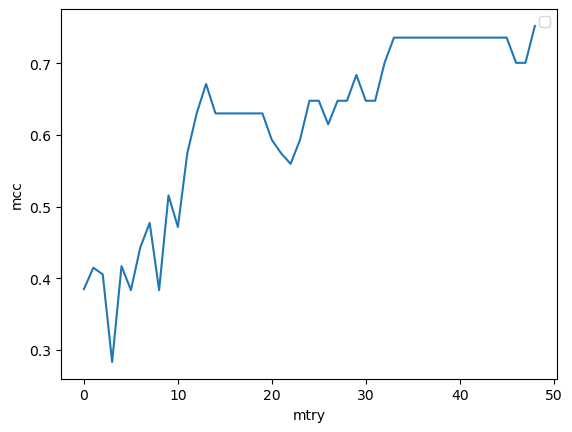

for model 1 validation metrics of:
positives in data 28
negatives in data 46 

fn count = 17
tn count = 45
tp count = 11
fp count = 1 

net accuracy = 0.7567567567567568
positive accuracy = 0.39285714285714285
negative accuracy = 0.9782608695652174 

fpr = 0.021739130434782608
tpr = 0.39285714285714285 

f1 score = 0.55
mcc = 0.4882963717771308
cohen Kappa = 0.4178321678321678


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 2 best mcc of 0.36492499087551356 with an mtry of 14


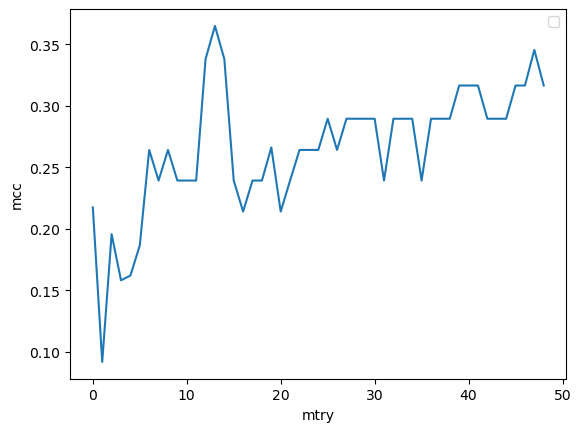

for model 2 validation metrics of:
positives in data 20
negatives in data 54 

fn count = 14
tn count = 49
tp count = 6
fp count = 5 

net accuracy = 0.7432432432432432
positive accuracy = 0.3
negative accuracy = 0.9074074074074074 

fpr = 0.09259259259259259
tpr = 0.3 

f1 score = 0.3870967741935484
mcc = 0.2589223400015712
cohen Kappa = 0.24163969795037757


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 3 best mcc of 0.4801529865296696 with an mtry of 5


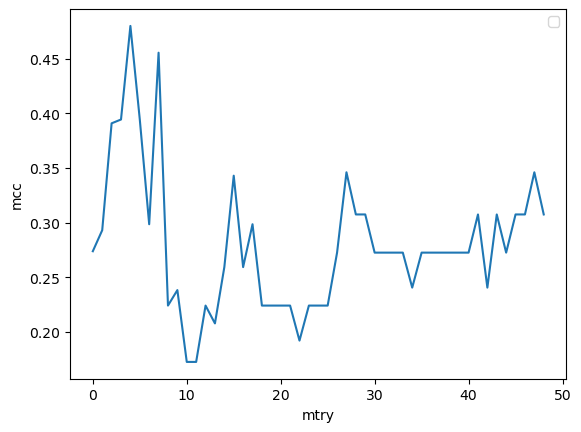

for model 3 validation metrics of:
positives in data 17
negatives in data 57 

fn count = 8
tn count = 51
tp count = 9
fp count = 6 

net accuracy = 0.8108108108108109
positive accuracy = 0.5294117647058824
negative accuracy = 0.8947368421052632 

fpr = 0.10526315789473684
tpr = 0.5294117647058824 

f1 score = 0.5625
mcc = 0.44382146025949554
cohen Kappa = 0.44241119483315394


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 4 best mcc of 0.51733344577696 with an mtry of 3


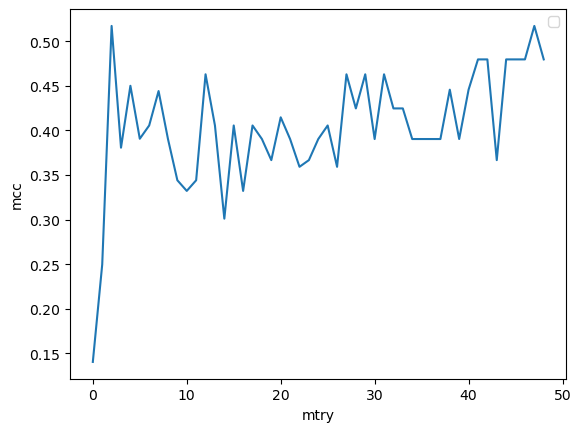

for model 4 validation metrics of:
positives in data 22
negatives in data 52 

fn count = 16
tn count = 43
tp count = 6
fp count = 9 

net accuracy = 0.6621621621621622
positive accuracy = 0.2727272727272727
negative accuracy = 0.8269230769230769 

fpr = 0.17307692307692307
tpr = 0.2727272727272727 

f1 score = 0.32432432432432434
mcc = 0.11329746787173461
cohen Kappa = 0.109720885466795


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 5 best mcc of 0.5318593689792568 with an mtry of 40


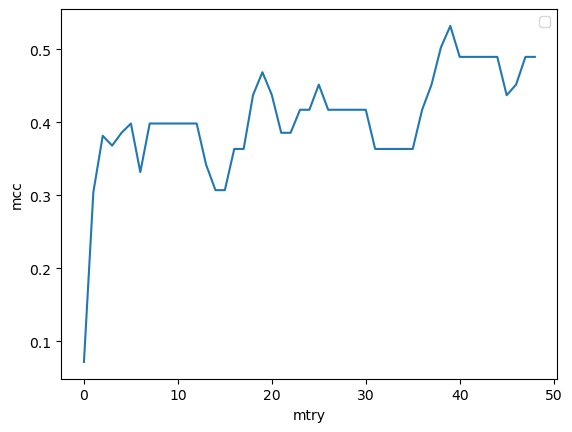

for model 5 validation metrics of:
positives in data 20
negatives in data 51 

fn count = 10
tn count = 48
tp count = 10
fp count = 3 

net accuracy = 0.8169014084507042
positive accuracy = 0.5
negative accuracy = 0.9411764705882353 

fpr = 0.058823529411764705
tpr = 0.5 

f1 score = 0.6060606060606061
mcc = 0.5131292304234817
cohen Kappa = 0.4936917169500823


In [3]:
model_list = []
testdat = []
#For loop that uses each fold once for valid/testing and the rest for training
#Each 'split' in the range corresponds to the set used for test/validation with the other 4 for training
iteration = 1
for split in range(0,5):
    #Set creation
    trainlist = [df for i, df in enumerate(folds) if i != split]
    trainset = pd.concat(trainlist, axis=0)
    testset, validset = train_test_split(folds[split], test_size=0.5, random_state=seed)
    
    ytrain = trainset[0].values
    xtrain = trainset.iloc[:, 1:]
    
    ytest = testset[0].values
    xtest = testset.iloc[:, 1:]
    
    yvalid = validset[0].values
    xvalid = validset.iloc[:, 1:]
    
    #lists of metric values
    mcclist = []
    maxval = 0
    for mtry in range(1, 50):
        #using mtry as the adjusted hyperparameter creates a series of random forests
        rf = RandomForestClassifier(n_estimators=mtry, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=seed, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

        model= rf.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        #calculate metric (mcc)
        mcc = metriccalc(preds, ytest)[12]
        mcclist.append(mcc)
        if mcc > maxval:
            maxval = mcc
            bestmetrics = mtry
    #store best model for the given fold and plot the metric vs mcc value
    rf = RandomForestClassifier(n_estimators=bestmetrics, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=seed, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    model_list.append(rf)
    testdat.append(maxval)
    print('for fold', split + 1, 'best mcc of', maxval, 'with an mtry of', bestmetrics)
    plt.plot(mcclist)

    plt.xlabel('mtry')
    plt.ylabel('mcc')
    plt.legend()
    plt.show()
    
    #check models onto validation set, printing various metrics
    model= rf.fit(xtrain, ytrain)
    preds = model.predict(xvalid)
    results = metriccalc(preds, yvalid)
    print('for model', iteration, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13])
    iteration = iteration + 1

In [4]:
y = tempset[:, 0]
x = tempset[:, 1:]
validmccs = []
iter = 1
for model in model_list:
    predictions = []
    preds = model.predict(x)
    predictions.append(preds)
    
    results = metriccalc(preds, y)
    print('model', iter, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13], '\n')
    iter = iter + 1
    
    validmccs.append(results[12])

model 1 validation metrics of:
positives in data 58
negatives in data 125 

fn count = 36
tn count = 115
tp count = 22
fp count = 10 

net accuracy = 0.7486338797814208
positive accuracy = 0.3793103448275862
negative accuracy = 0.92 

fpr = 0.08
tpr = 0.3793103448275862 

f1 score = 0.4888888888888889
mcc = 0.36662938284011887
cohen Kappa = 0.34017871139677064 

model 2 validation metrics of:
positives in data 58
negatives in data 125 

fn count = 40
tn count = 110
tp count = 18
fp count = 15 

net accuracy = 0.6994535519125683
positive accuracy = 0.3103448275862069
negative accuracy = 0.88 

fpr = 0.12
tpr = 0.3103448275862069 

f1 score = 0.3956043956043956
mcc = 0.23036021948462182
cohen Kappa = 0.2152046783625731 

model 3 validation metrics of:
positives in data 58
negatives in data 125 

fn count = 39
tn count = 109
tp count = 19
fp count = 16 

net accuracy = 0.6994535519125683
positive accuracy = 0.3275862068965517
negative accuracy = 0.872 

fpr = 0.128
tpr = 0.327586206896551

In [5]:
#get x and y values for the final validation set


toxvals = []
fingerprints = []
for row in tempset:
    toxvals.append(row[0])
    fingerprints.append(row[1:])


In [6]:
#calculates consensus of models on each fingerprint in the final validation set
consensuslist = []
predictions = []
for fp in fingerprints:
    consensus = -1
    fp = fp.reshape(1, -1)
    #appends each model's prediction to a list
    predictions = []
    predlist = []
    for model in model_list:
        preds = model.predict(fp)
        predictions.append(preds)
        predlist.append(preds)
    predictions.append(predlist)
    
    #finds number of 0s in the prediction list
    zercount = 0
    for num in predictions:
        if num == 0:
            zercount = zercount + 1
    #as there are 5 models, if there are less than 3 0s predicted, the consensus is 1
    if zercount < 3 :
        consensus = 1
    else:
        consensus = 0
    consensuslist.append(consensus)
#calculate and print metrics
results = metriccalc(consensuslist, toxvals)
print('validation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1], '\n')
print('fn count =', results[2])
print('tn count =', results[3])
print('tp count =', results[4])
print('fp count =', results[5], '\n')
print('net accuracy =', results[6])
print('positive accuracy =', results[7])
print('negative accuracy =', results[8], '\n')
print('fpr =', results[9])
print('tpr =', results[10], '\n')
print('f1 score =',results[11])
print('mcc =',results[12])
print('cohen Kappa =',results[13])

validation metrics of:
positives in data 58
negatives in data 125 

fn count = 37
tn count = 118
tp count = 21
fp count = 7 

net accuracy = 0.7595628415300546
positive accuracy = 0.3620689655172414
negative accuracy = 0.944 

fpr = 0.056
tpr = 0.3620689655172414 

f1 score = 0.4883720930232558
mcc = 0.3955882962263099
cohen Kappa = 0.35532425940752604


In [7]:
#with open('/Users/james/Documents/Honours/practhesisprep/figure prep/radarplotdata.txt', 'w') as f:
#    print('Chemopy SR-ATD5 RF Consensus MCC =', results[12] , file=f)

In [9]:
testdat

[0.7520633904037279,
 0.36492499087551356,
 0.4801529865296696,
 0.51733344577696,
 0.5318593689792568]

In [10]:
validmccs

[0.36662938284011887,
 0.23036021948462182,
 0.2361210185506815,
 0.2739204212714777,
 0.364555728212133]